# Uczenie maszynowe - regresja liniowa

Zadanie: należy przewidzieć dochód firmy transportowej ($y$ wyrażony w 10.000 USD) w zależności od ludności miasta ($x$ wyrażony w 10.000 mieszkańców).

Dane pochodzą z kursu "Machine Learning", Andrew Ng, Coursera.

In [33]:
# Nagłowki, można zignorować

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import ipywidgets as widgets
from ipywidgets import fixed

#import warnings
#with warnings.catch_warnings():
#    warnings.simplefilter("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.display import display, Math, Latex

In [34]:
# Wczytanie pliku za pomocą csv.reader

import csv
reader = csv.reader(open("ex1data1.txt"), delimiter=",")

x = list()
y = list()
for xi, yi in reader:
    x.append(float(xi))
    y.append(float(yi)) 
    
print("x = ", x[:10])
print("y = ", y[:10])

('x = ', [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546])
('y = ', [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12.0, 6.5987, 3.8166])


## 1. Przykładowe dane

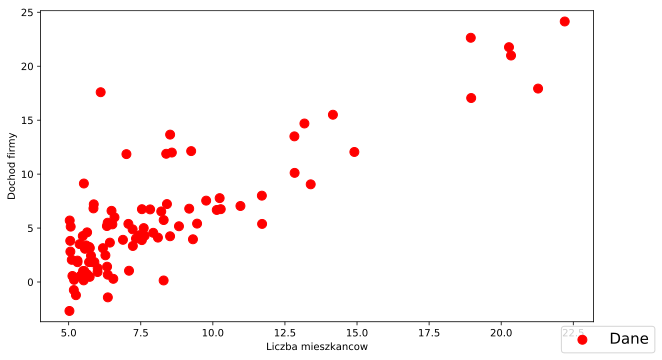

In [35]:
# Funkcje rysujące wykres kropkowy oraz prostą regresyjną

def regdots(x, y):    
    fig = pl.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c='r', s=80, label="Dane")
    
    ax.set_xlabel("Liczba mieszkancow")
    ax.set_ylabel("Dochod firmy")
    ax.margins(.05,.05)
    pl.ylim(min(y)-1, max(y)+1)
    pl.xlim(min(x)-1, max(x)+1)
    return fig

def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(X, Y, linewidth='2', 
            label=(r'$y=%.2f+%.2f x$' % (theta[0], theta[1])))

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

fig = regdots(x,y)
legend(fig)

## 2. Ręczny dobór parametrów 

$$
\begin{array}{lclc}
\text{Parametry:} & \theta = \left[\begin{array}{c}\theta_0\\ \theta_1\end{array}\right] & 
\text{Model:} & h_{\theta}(x) = \theta_0 + \theta_1 x
\end{array}
$$

In [36]:
# Definicja prostej, funkcja jednej zmienniej

def h(theta, x):
    return theta[0] + theta[1]*x

ToggleButton(value=False, description=u'show')

FloatSlider(value=0.0, description=u'theta0', max=10.0, min=-10.0)

FloatSlider(value=0.0, description=u'theta1', max=5.0, min=-5.0)

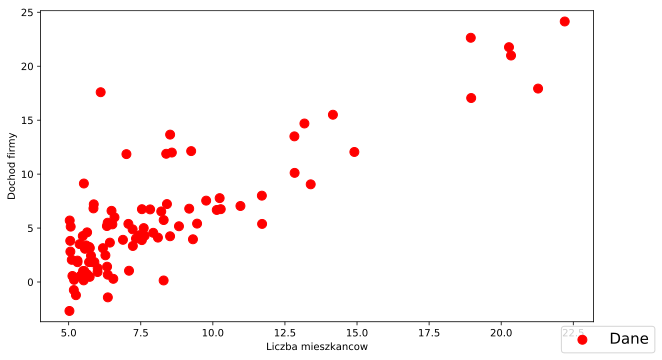

In [37]:
# Funkcje do obsługi interakcji, można zignorować

def Slide1(x, y, fun, show, theta0, theta1):
    fig = regdots(x, y)
    if(show):
        regline(fig, fun, [theta0, theta1], x)
    legend(fig)

toggleButton1 = widgets.ToggleButton(value=False, width=100)
sliderTheta01 = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description=r'theta0', width=300)
sliderTheta11 = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description=r'theta1', width=300)
widgets.interactive(Slide1, x=fixed(x), y=fixed(y), fun=fixed(h), 
                    show=toggleButton1, theta0=sliderTheta01, 
                    theta1=sliderTheta11)
display(toggleButton1)
display(sliderTheta01)
display(sliderTheta11)

fig1 = regdots(x, y)
legend(fig1)

### Funkcja kosztu $J(\theta)$

Szukamy $\hat\theta$ takie, że minimalizuje funkcję kosztu (błędu) $J(\theta)$:

$$\theta = \left[\begin{array}{c} \theta_0 \\ \theta_1 \end{array}\right] \in \mathbb{R}^2 \quad J:\mathbb{R^2} \rightarrow \mathbb{R}$$

$$ \hat\theta = \underset{{\theta \in \mathbb{R}^{2}}}{\operatorname{arg\,min}} J(\theta)$$

### Metoda najmniejszych kwadratów

$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{2m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2  \\
& = & \dfrac{1}{2m} \displaystyle \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^{(i)}  - y^{(i)}\right)^2
\end{array} $$

gdzie $m$ - liczba przykładów w zestawie danych

In [38]:
# Definicja funkcji błędu

def J(h, theta, x, y):
    m = len(y)
    return (1.0/(2*m) * sum((h(theta, x[i]) - y[i])**2 
                          for i in range(m)))

# Wpisz dowolne wartości jako parametry theta, np. ustalone wcześniej
display(Math(r"\Large J(\theta) = %.4f" % J(h,[-3, 1.1],x,y)))

<IPython.core.display.Math object>

### Płaszczyzna błędu $J(\theta)$

* Widzimy, że $J(\theta)$ tworzy funkcję wypukłą. 
* Punkt przecięcia z czerwoną linią to minimum.

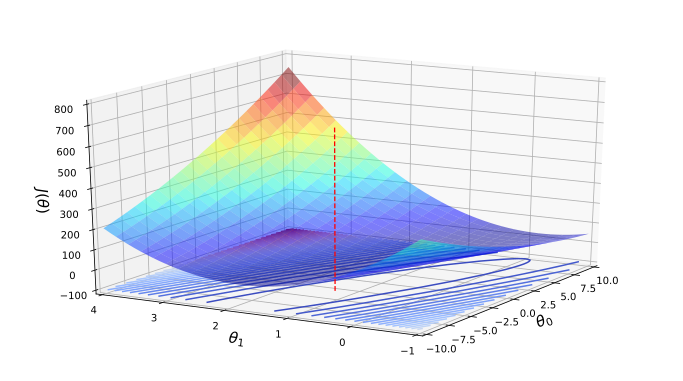

In [39]:
# Funkcje pomocnicze do rysowania płaszczyzny, można zignorować

from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline

def errorSurface(x, y):
    pX = np.arange(-10,10.1,0.1)
    pY = np.arange(-1,4.1,0.1)
    pX, pY = np.meshgrid(pX, pY)
    
    pZ = np.matrix([[J(h,[t0, t1], x, y) 
                     for t0, t1 in zip(xRow, yRow)] 
                    for xRow, yRow in zip(pX, pY)])
    
    fig = pl.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111, projection='3d')
    pl.subplots_adjust(left=0.0, right=1, bottom=0.0, top=1)
    ax.plot_surface(pX ,pY, pZ, rstride=2, cstride=8, linewidth=0.5,
                    alpha=0.5, cmap='jet', zorder=0,
                    label=r"$J(\theta)$")
    ax.view_init(elev=20., azim=-150)

    ax.set_xlim3d(-10, 10);
    ax.set_ylim3d(-1, 4);
    ax.set_zlim3d(-100, 800);

    N = range(0,800,20)
    pl.contour(pX,pY,pZ, N,zdir='z',offset=-100, cmap='coolwarm', alpha=1)
    
    ax.plot([-3.89578088] * 3,
            [ 1.19303364] * 3,
            [-100, 4.47697137598, 700], 
            color='red', alpha=1, linewidth=1.3, zorder=100, 
            linestyle='dashed',
           label="Minimum: 4.4770")

    ax.set_zlabel(r"$J(\theta)$", fontsize="15")
    ax.set_xlabel(r"$\theta_0$", fontsize="15")
    ax.set_ylabel(r"$\theta_1$", fontsize="15")
    ax.margins(0,0,0)
    fig.tight_layout()
    return fig, ax;

def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx

fig, ax = errorSurface(x,y);
legend(fig);

## 3. Minimalizacja błędu $J(\theta)$

ToggleButton(value=False, description=u'show')

FloatSlider(value=0.0, description=u'theta0', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=0.0, description=u'theta1', max=5.0, min=-5.0, step=0.01)

FloatText(value=0.0, description=u'J:')

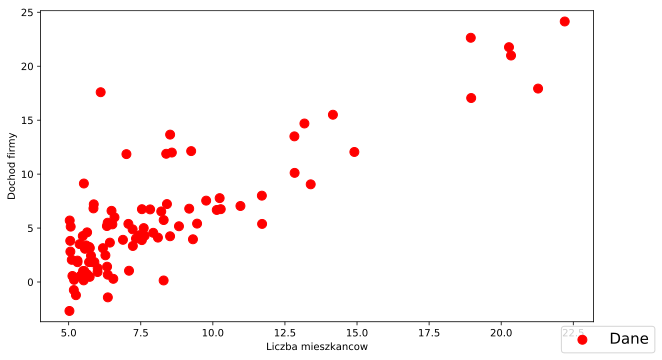

In [9]:
# funkcje do rysowania i interakcji, można ignorować

def Slide2(x, y, fun, show, theta0, theta1, Jout):
    fig = regdots(x, y)
    if(show):
        regline(fig, fun, [theta0, theta1], x)
        Jout.value = '%.4f' % J(fun, [theta0, theta1], x, y)
    legend(fig)

toggleButton2 = widgets.ToggleButton(value=False, width=100)
sliderTheta02 = widgets.FloatSlider(min=-10, max=10, step=0.01, value=0, description=r'theta0', width=300)
sliderTheta12 = widgets.FloatSlider(min=-5, max=5, step=0.01, value=0, description=r'theta1', width=300)
text2 = widgets.FloatText(value=0, description=r'J:', width=100)

widgets.interactive(Slide2, x=fixed(x), y=fixed(y), fun=fixed(h), 
                    show=toggleButton2, theta0=sliderTheta02, 
                    theta1=sliderTheta12, Jout=fixed(text2));

display(toggleButton2)
display(sliderTheta02)
display(sliderTheta12)
display(text2)

fig2 = regdots(x, y)
legend(fig2)

### Metoda Gradientu Prostego

### Reguła aktualizacji parametrów $\theta_j$:

$$\theta_j := \theta_j - \alpha \dfrac{\partial}{\partial\theta_j}J(\theta) \textrm{ dla każdego $j$}$$

gdzie
$$\small
\begin{array}{rcl}
\dfrac{\partial}{\partial\theta_j} J(\theta) 
 & = & \dfrac{\partial}{\partial\theta_j} \dfrac{1}{2m} \displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2\\
 & = & 2 \cdot \dfrac{1}{2m} \displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot \dfrac{\partial}{\partial\theta_j} (h_\theta(x^{(i)}) - y^{(i)})\\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot \dfrac{\partial}{\partial\theta_j} \left(\displaystyle\sum_{i=0}^n \theta_ix_i^{(i)} - y^{(i)}\right)\\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\
\end{array}
$$

### Jeszcze raz reguła aktualizacji parametrów $\theta_j$:

Dla regresji liniowej jednej zmiennej mamy model:

$$ h_\theta(x) = \theta_0 + \theta_1x $$

czyli powtarzamy aż do konwergencji ($\theta_1$ i $\theta_2$ należy aktualizować równocześnie):

$$
\begin{array}{rcl}
\theta_0 & := & \theta_0 - \alpha \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})\\ 
\theta_1 & := & \theta_1 - \alpha \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x^{(i)}\\ 
\end{array}
$$

## 4. Metoda prostego gradientu: implementacja

In [10]:
# Implementacja algorytmu gradient descent, wersja bez macierzy

def GD(h, fJ, theta, x, y, alpha=0.1, eps=10**-3):
    errorCurr = fJ(h, theta, x, y)
    errors = [[errorCurr, theta]] # Logujemy poziom błędu

    m = len(y)
    while True:
        # Równoczesna aktualizacja za pomocą zmiennej tymczasowej
        thetaPrime = [0, 0]
        thetaPrime[0] = theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i] 
                                                 for i in range(m)) 
        thetaPrime[1] = theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i] 
                                                 for i in range(m))
        theta = thetaPrime
        # Kryterium stopu
        errorCurr, errorPrev = fJ(h, theta, x, y), errorCurr
        if abs(errorPrev - errorCurr) <= eps:
            break
        errors.append([errorCurr, theta]) # Logujemy poziom błędu
    return theta, errors

thetaBest, errors = GD(h, J, [0,0], x, y, alpha=0.01, eps=0.0001)

#######################################################################
display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(thetaBest).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % errors[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(errors)))  

<IPython.core.display.Math object>

## Współczynnik $\alpha$ (długości kroku)

In [11]:
# Rysowanie, zignorować

from ipywidgets import interact, fixed, FloatSlider

# Implementacja tylko dla wyświetlania grafiki, zingnorować.
def GDWithErrorTrace(h, fJ, theta, x, y, alpha=0.1, eps=10**-3, steps=None):
    errorCurr = fJ(h, theta, x, y)
    errors = [[errorCurr, theta]] # Logujemy poziom błędu

    m = len(y)
    while True:
        # Równoczesna aktualizacja za pomocą zmiennej tymczasowej
        thetaPrime = [0, 0]
        thetaPrime[0] = theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i] 
                                                 for i in range(m)) 
        thetaPrime[1] = theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i] 
                                                 for i in range(m))
        theta = thetaPrime
        
        # Nieistotne
        if steps != None and len(errors) >= steps:
            break
        
        # Kryterium stopu
        errorCurr, errorPrev = fJ(h, theta, x, y), errorCurr
        if abs(errorPrev - errorCurr) <= eps:
            break
        errors.append([errorCurr, theta[:]]) # Logujemy poziom błędu
        
    return theta, errors

thetaBest, errors = GDWithErrorTrace(h, J, [0,0], x, y, alpha=0.01, eps=0.0)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(thetaBest).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % errors[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(errors)))

def addError(ax, errors, color = 'r'):
    eX = [theta[0] for j, theta in errors]
    eY = [theta[1] for j, theta in errors]
    eZ = [j for j, theta in errors]
    ax.plot(eX, eY, eZ, color='red', alpha=1, linewidth=1.3, zorder=100)

def Step(theta, x, y, step, alpha):
    fig, ax = errorSurface(x,y)
    errors = GDWithErrorTrace(h, J, theta, x, y, alpha=alpha, eps=0.001, steps=step)[1]
    addError(ax, errors)
    legend(fig)

sliderStep = FloatSlider(min=0, max=200, step=1, 
                               value=5, description=u"step")
sliderAlpha = FloatSlider(min=0.001, max=0.03, step=0.01, 
                                value=0.001, description="alpha")

thetaStart = [5,3] 
interact(Step, theta=fixed(thetaStart), x=fixed(x), y=fixed(y), 
         step=sliderStep, alpha=sliderAlpha);

<IPython.core.display.Math object>

interactive(children=(FloatSlider(value=5.0, description=u'step', max=200.0, step=1.0), FloatSlider(value=0.001, description=u'alpha', max=0.03, min=0.001, step=0.01), Output()), _dom_classes=('widget-interact',))

## 5. Notacja macierzowa

Zapis macierzowy danych trenujących:

$$X=\left[\begin{array}{cc}
1 & (\vec x^{(1)})^T \\
1 & (\vec x^{(2)})^T \\
\vdots & \vdots\\
1 & (\vec x^{(m)})^T \\
\end{array}\right] 
= \left[\begin{array}{cccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots\\
1 & x_1^{(m)} & \cdots & x_n^{(m)} \\
\end{array}\right] $$

 $$\vec{y} = 
\left[\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{array}\right]
\quad
\theta = \left[\begin{array}{c}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n\\
\end{array}\right]$$

In [26]:
# Wczytwanie danych z pliku za pomocą numpy
# Wersje macierzy funkcji rysowania wykresów punktowych oraz krzywej regresyjnej

data = np.loadtxt("ex1data1.txt", delimiter=",")
m, np1 = data.shape # np1 : n plus 1
n = np1 - 1
Xn = data[:,0:n].reshape(m,n)

# Dodaj kolumnę jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m,np1)
yMx = np.matrix(data[:,1]).reshape(m,1)

def hMx(theta, X):
    return X*theta

def regdotsMx(X, y):    
    fig = pl.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    print(X[:,1].shape)
    ax.scatter([X[:,1]], [y], c='r', s=80, label="Dane")
    
    ax.set_xlabel("Populacja")
    ax.set_ylabel("Zysk")
    ax.margins(.05,.05)
    pl.ylim(y.min()-1, y.max()+1)
    pl.xlim(np.min(X[:,1])-1, np.max(X[:,1])+1)
    return fig

def reglineMx(fig, fun, theta, X):
    ax = fig.axes[0]
    x0, x1 = np.min(X[:,1]), np.max(X[:,1])
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2,2)
    ax.plot(L, fun(theta, LX), linewidth='2', 
            label=(r'$y=%.2f+%.2f x$' % (theta[0][0], theta[1][0])))

### Funkcja kosztu w notacji wektorowej

$$J(\theta)=\dfrac{1}{2|\vec y|}\left(X\theta-\vec{y}\right)^T\left(X\theta-\vec{y}\right)$$ 


In [27]:
# Wersja macierzowa funkcji kosztu

def JMx(theta,X,y):
    m = len(y)
    J = 1.0/(2.0*m)*((X*theta-y).T*(X*theta-y))
    return J.item()

thetaMx = np.matrix([-5,1.3]).reshape(2,1) 

error = JMx(thetaMx,XMx,yMx) 
display(Math(r'\Large J(\theta) = %.4f' % error))

<IPython.core.display.Math object>

### Gradient w postaci wektorowej

Znacząco uproszczony zapis gradientu:

$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T\left(X\theta-\vec y\right)$$

In [28]:
# Wersja macierzowa gradientu funkcji kosztu

def dJMx(theta,X,y):
    return 1.0/len(y)*(X.T*(X*theta-y)) 

thetaMx2 = np.matrix([-5,1.3]).reshape(2,1)

display(Math(r'\large \theta = ' + LatexMatrix(thetaMx2) + 
             r'\quad' + r'\large \nabla J(\theta) = ' 
             + LatexMatrix(dJMx(thetaMx2,XMx,yMx))))       


<IPython.core.display.Math object>

### Metoda gradientu prostego w postaci wektorowej

$$ \theta = \theta - \alpha \nabla J(\theta) $$

In [29]:
# Implementacja algorytmu gradient descent za pomocą numpy i macierzy

def GDMx(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-3):
    errorCurr = fJ(theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y) # implementacja wzoru
        errorCurr, errorPrev = fJ(theta, X, y), errorCurr
        if abs(errorPrev - errorCurr) <= eps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

thetaStartMx = np.matrix([0,0]).reshape(2,1)

# Zmieniamy wartosci alpha (rozmiar kroku) oraz eps (kryterium stopu)
thetaBestMx, errors = GDMx(JMx, dJMx, thetaStartMx, 
                       XMx, yMx, alpha=0.01, eps=0.00001)

######################################################################
display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(thetaBestMx) + 
             (r' \quad J(\theta) = %.4f' % errors[-1][0])  
             + r' \quad \textrm{po %d iteracjach}' % len(errors)))  

<IPython.core.display.Math object>

### Kryterium stopu

(97, 1)


<IPython.core.display.Math object>

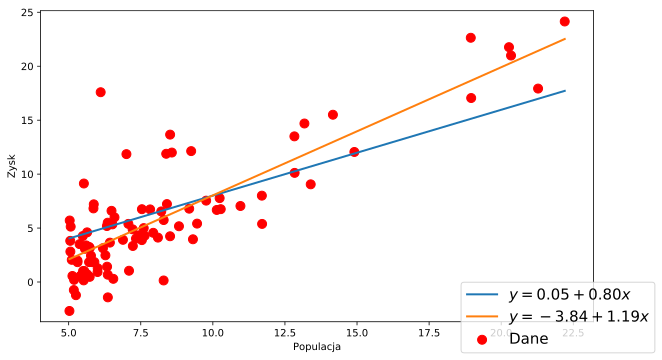

In [30]:
# Porównanie różnych wartości eps

fig = regdotsMx(XMx, yMx)

theta_e1, errors1 = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.01)
reglineMx(fig, hMx, theta_e1, XMx)

theta_e2, errors2 = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.000001)
reglineMx(fig, hMx, theta_e2, XMx)

legend(fig)
display(Math(r'\theta_{10^{-2}} = ' + LatexMatrix(theta_e1) + 
             r'\quad\theta_{10^{-6}} = ' + LatexMatrix(theta_e2) ))

## 6. Regresja liniowa za pomocą macierzy normalnej

### Macierz normalna
Zamiast z algorytmu GD możemy bezpośrednio obliczyć minimum $J(\theta)$ dla regresji liniowej wzorem: 

$$\theta = (X^TX)^{-1}X^T \vec y$$

In [31]:
# Macierz normalna, implementacja za pomocą numpy (było na ćwiczeniach 1)

def norm(X,y):
    return (X.T*X)**-1*X.T*y

thetaNorm = norm(XMx, yMx)
display(Math(r'\Large \theta = ' + LatexMatrix(thetaNorm)))
display(Math(r'\Large J(\theta) = %.4f' % JMx(thetaNorm, XMx, yMx)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(97, 1)


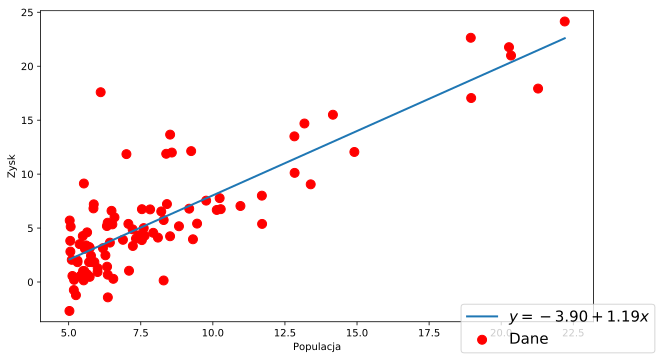

In [32]:
# Wykres prostej regresyjnej z parametrami theta uzyskanymi za pomocą macierzy normalnej

fig = regdotsMx(XMx, yMx)
reglineMx(fig, hMx, thetaNorm, XMx);
legend(fig);